
# Keypoint Selection

This notebook contains code to help you select corresponding keypoints for a pair of images 
to use for your morphing and face swaop experiments.  We will use the same interactive
keypoint selection method that we used for panorama stitching. Picking out 20-30 corresponding 
keypoints in one go is challenging since we need to make sure and click on the points in the
exact same order for the two images.  The code below addresses this by breaking down the 
process into a number of batches where in each batch we just click on a few sets of points 
at a time. This is accomplished by re-executing the same cell multiple times until a sufficient
number of keypoints have been selected. You should feel free to modify the code as you see fit 
to make the process easy for you.

The images you choose should meet the following criteria:
1. Images should be color images containing human faces (no animals, cartoons etc.)
2. The face should fill most of the frame so that there isn't a lot of background, body etc.
3. Images should be of sufficiently large resolution (>200 pixels in width/height)
4. Both images need to be the same resolution. This is just to simplify our implementation of face morphing.  Please crop or resize as necessary to make them the same dimensions



In [32]:
%matplotlib notebook

import a5utils
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [34]:
image1 = plt.imread('paulgeorge.jpg')
image2 = plt.imread('russ.jpg')

#convert images to floating point
if (image1.dtype == np.uint8):
    image1 = image1.astype(float) / 256
    
if (image2.dtype == np.uint8):
    image2 = image2.astype(float) / 256

#print(image1.shape[2])

# images should be same size for morphing 
assert(image1.shape == image2.shape)

# prepare to click some points.
# we will click points in small batches to make it 
# easier to keep track of correspondences.


#number of points to click per-batch
npoints = 4

# initialize
batch = 0


<IPython.core.display.Javascript object>


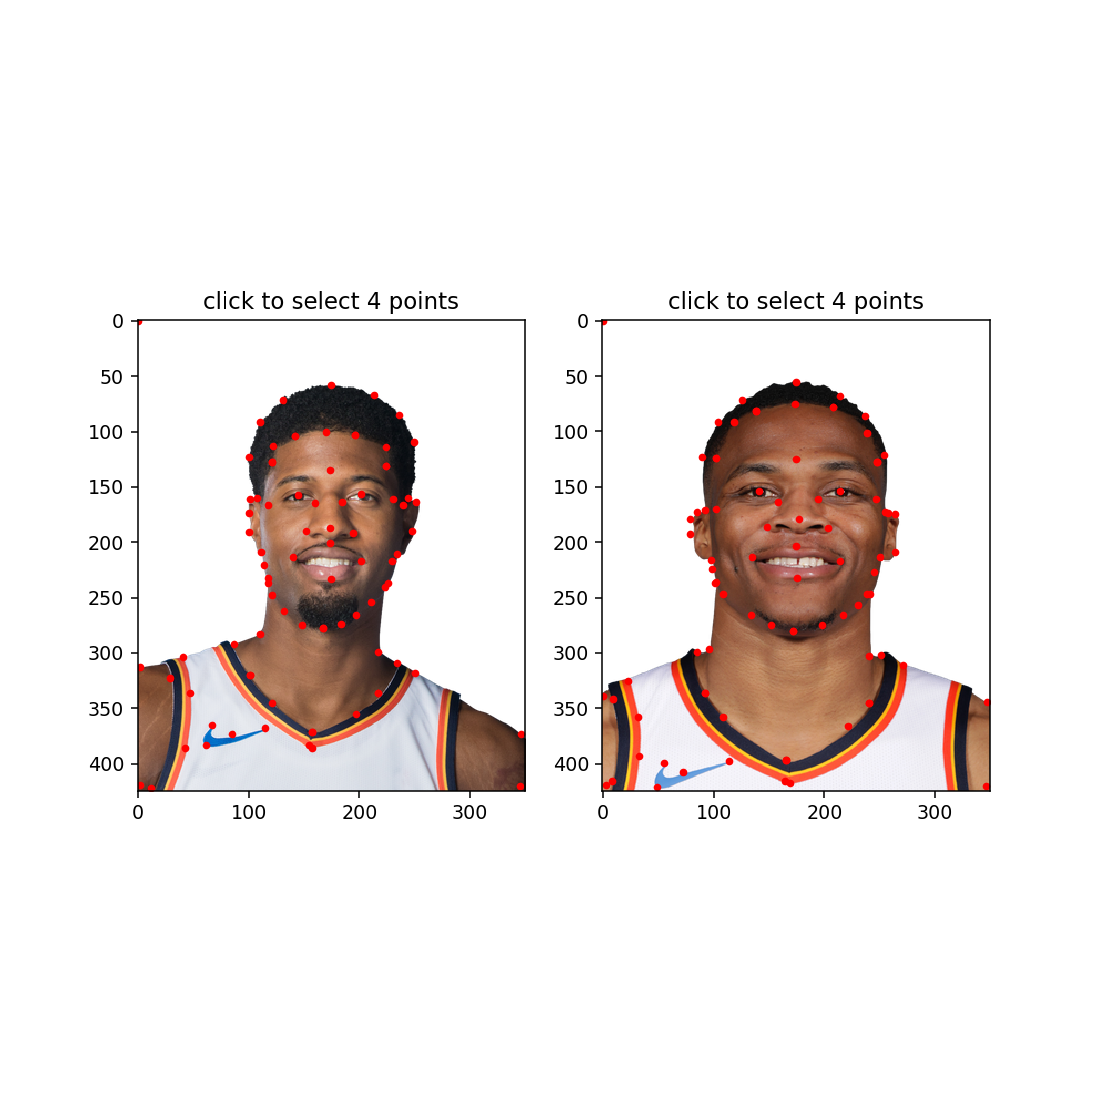

In [79]:
# re-execute this cell as many times as needed to 
# label a dense set of points.

#make the figure a bit bigger so it is easier to click
plt.rcParams['figure.figsize'] = [8, 8]

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image1)
if (batch>0):
    ax1.plot(coords1[0,:],coords1[1,:],'r.')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(image2)
if (batch>0):
    ax2.plot(coords2[0,:],coords2[1,:],'r.')

pts1 = a5utils.select_k_points(ax1,npoints)
pts2 = a5utils.select_k_points(ax2,npoints)



In [78]:
# execute this cell after each round of clicking in order
# to append the clicked points to the array
if (batch==0):
    coords1 = np.array((pts1.xs,pts1.ys))
    coords2 = np.array((pts2.xs,pts2.ys))
else:
    coords1 = np.append(coords1,np.array((pts1.xs,pts1.ys)),axis=1)
    coords2 = np.append(coords2,np.array((pts2.xs,pts2.ys)),axis=1)

batch = batch + 1

In [80]:
# save out the results for use in your notebook
f = open('face_correspondeces.pckl','wb')
pickle.dump((image1,image2,coords1,coords2),f)
f.close()